## Measuring Varying Project Goals to Assess Potential Greater Return of Amount Pledged**

For my project, I’ll be examining a dataset containing multiple years of Kickstarter project data to assess the degree of success based on the initial asking goal amount, relative to excess money pledged.  The data comes from Kaggle by user Mickaël Moullié, chosen for its large count, having relatively recent data, and converting all monetary values into U.S. dollars to make for easier translation for globally funded projects involving multiple currencies.  I’m only going to assess projects between 1-30 days, as that’s what Kickstarter recommends to have see the greatest chance at project success.
My key metric is the pledged amount divided by set goal.  
      `key_metric = pledged / goal`

This is so that these two values have a relationship that can be measured more equally between different goal tiers, vs just having the pledge amount.  With this metric, extreme values would indicate either very successful or very ambitious projects, relative to goal amount, and could be determined to be outliers to discard.  To compare as equal projects as possible, I will be testing within each of the 15 main categories.  

array(['Games', 'Fashion', 'Film & Video', 'Technology', 'Art', 'Music',
       'Journalism', 'Design', 'Publishing', 'Comics', 'Crafts', 'Food',
       'Dance', 'Theater', 'Photography'], dtype=object)

```
kickstarter_df['main_category'].unique()

array(['Games', 'Fashion', 'Film & Video', 'Technology', 'Art', 'Music',
       'Journalism', 'Design', 'Publishing', 'Comics', 'Crafts', 'Food',
       'Dance', 'Theater', 'Photography'], dtype=object)
```

From there I will set a low and high tier of goals as my two test groups.  My null hypothesis is that the amount pledged over goal within the same category between lower and higher initial goals are equal; my alternative hypothesis is that they differ.  



The significance of this test would be showing that, if we can reject the null, there is a significant difference in amount pledged based on how you define your project by goal.  For example, if the key metric is positive when comparing a lower and higher initial goal tier group, then, on average, setting a higher goal amount ends up leading to relatively more funds.  This could indicate that backers who want to support a project aren’t deterred from donating solely based off the higher amount needed to raise, vs supporting a project that can be successful with less funds.  Knowing this, a project creator could set their goal higher than needed, because they will end up earning even more money over their goal.  Alternatively, if there’s no significant difference, then we can’t prove that, on average, any project earns relatively more than another based off of initial goal, and creators should just ask for the minimum amount they need.


All these points aim to inform those creating Kickstarter projects how their user set goals could end up affecting the total amount of money they will get.  While there are additional details influenced or decided by the creator, such as the popularity of the project creator, length of project, and the rewards offered for contributing, these tests aim to give a general insight into project success for one facet all projects have in common.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import timedelta
import math

In [ ]:
# Must create new Kaggle API token to download kaggle.json
# Found how to download kaggle datasets from this url: https://www.kaggle.com/general/74235

import pandas as pd
! pip install -q kaggle
from google.colab import files

files.upload()  # upload kaggle.json





Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"trevinwacker","key":"0f9d2d3e94ca0976d5a64006016364bb"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-23 12:01:34           8090  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-23 06:03:57           3998  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           3306  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            632  
etsc9287/2020-general-election-polls    

In [ ]:
! kaggle datasets download -d kemical/kickstarter-projects

! unzip kickstarter-projects.zip -d Downloads

with open('Downloads/ks-projects-201801.csv', encoding="utf8", errors='ignore') as f: ## This code/trick was found here on StackOverflow: https://stackoverflow.com/questions/42339876/error-unicodedecodeerror-utf-8-codec-cant-decode-byte-0xff-in-position-0-in
  ks_df_original = pd.read_csv(f) ## I only had this initially and it wouldn't read (except f was the pathway). This works except it has a unicode error ('utf-8' can't read)
                                  ## Adding as note to myself!!

kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  kickstarter-projects.zip
replace Downloads/ks-projects-201612.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Downloads/ks-projects-201801.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
ks_df_original.dtypes  ## Looking at dataframe types

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [ ]:
ks_df_original.head()  ## Seeing original dataset before cleaning

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
ks_df_original.info() # There are some null values in the usd_pledged_real field that will need to be addressed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [ ]:
ks_df = ks_df_original   ## Making a new df to clean

In [ ]:
ks_df.dropna(inplace=True)                   ## Getting rid of all the rows where we don't have proper info
ks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374860 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374860 non-null  object 
 3   main_category     374860 non-null  object 
 4   currency          374860 non-null  object 
 5   deadline          374860 non-null  object 
 6   goal              374860 non-null  float64
 7   launched          374860 non-null  object 
 8   pledged           374860 non-null  float64
 9   state             374860 non-null  object 
 10  backers           374860 non-null  int64  
 11  country           374860 non-null  object 
 12  usd pledged       374860 non-null  float64
 13  usd_pledged_real  374860 non-null  float64
 14  usd_goal_real     374860 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [ ]:
# The 'pledged' field is in native currency, so to avoid confusion I'm deleting it
ks_df.drop('pledged', axis=1, inplace=True)
ks_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
# The 'goal' and 'usd pledged' fields represent both the goal set and contribution made to a project in USD, but not the total amount pledged converted into USD,
# so I'm dropping them to avoid confusion
ks_df.drop('usd pledged', axis=1, inplace=True)
ks_df.drop('goal', axis=1, inplace=True)
ks_df.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [ ]:
# For accessibility, I'm redefining usd_pledged_real and usd_goal_real into pledged and goal, respectively, to be more concise
ks_df.rename(columns={'usd_pledged_real':'pledged', 'usd_goal_real':'goal'}, inplace=True)

In [ ]:
# Let's see what different states there are in the dataframe
ks_df['state'].unique()


array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [ ]:
# We only want to look completed projects, either having failed or succeeded, so we want to get rid of all projects where state = 'live', 'suspended', or 'canceled'
ks_df = ks_df[ks_df['state'] != 'canceled']
ks_df = ks_df[ks_df['state'] != 'live']
ks_df = ks_df[ks_df['state'] != 'suspended']
ks_df['state'].unique()

array(['failed', 'successful'], dtype=object)

In [ ]:
# Let's make sure the state field is accurate.
successful = ks_df[ks_df['pledged'] >= ks_df['goal']]  # Df with actual successful projects
successful['state'].unique()

array(['successful', 'failed'], dtype=object)

In [ ]:
# Because there are still projects labeled as 'failed' in the state field, we know it's not fully accurate, so we not use it as a reference.
ks_df.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,pledged,goal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00


In [ ]:
## Kickstarter's FAQ recommends having projects be within 30days, as success declines after that
## Let's cut down all the projects to 0-30 days
ks_df['deadline'] = pd.DatetimeIndex(data=ks_df['deadline'], freq='infer', ambiguous='infer').date          ## Converts the deadline & launched fields into
ks_df['launched'] = pd.DatetimeIndex(data=ks_df['launched'], freq='infer', ambiguous='infer').date          ## only dates
ks_df['day_length'] = ks_df['deadline'] - ks_df['launched']
ks_df.head(10)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,pledged,goal,day_length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11,failed,0,GB,0.0,1533.95,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02,failed,15,US,2421.0,30000.00,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12,failed,3,US,220.0,45000.00,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17,failed,1,US,1.0,5000.00,30 days
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26,successful,224,US,52375.0,50000.00,35 days
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,2014-12-01,successful,16,US,1205.0,1000.00,20 days
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,2016-02-01,failed,40,US,453.0,25000.00,45 days
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2013-09-09,failed,0,CA,0.0,2406.39,30 days
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,2013-03-09,successful,100,US,12700.0,12500.00,30 days
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,2014-09-02,failed,0,US,0.0,5000.00,30 days


In [ ]:
### Turning day_length into an integer
ks_df['test'] = pd.to_numeric(ks_df['day_length'], errors='coerce') ## Was unable to find python language to turn timedelta object into interger so using this workaround
ks_df = ks_df[ks_df['test'] <= 2592000000000000]  # This long value is equal to 30days in day_length
ks_df.head(10)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,pledged,goal,day_length,test
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17,failed,1,US,1.00,5000.00,30 days,2592000000000000
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,2014-12-01,successful,16,US,1205.00,1000.00,20 days,1728000000000000
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2013-09-09,failed,0,CA,0.00,2406.39,30 days,2592000000000000
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,2013-03-09,successful,100,US,12700.00,12500.00,30 days,2592000000000000
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,2014-09-02,failed,0,US,0.00,5000.00,30 days,2592000000000000
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,2017-04-05,successful,761,GB,121857.33,6469.73,28 days,2419200000000000
15,1000064368,Survival Rings,Design,Design,USD,2015-02-28,2015-01-29,failed,11,US,664.00,2500.00,30 days,2592000000000000
16,1000064918,The Beard,Comic Books,Comics,USD,2014-11-08,2014-10-09,failed,16,US,395.00,1500.00,30 days,2592000000000000
17,1000068480,Notes From London: Above & Below,Art Books,Publishing,USD,2015-05-10,2015-04-10,failed,20,US,789.00,3000.00,30 days,2592000000000000
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,2012-08-02,successful,7,US,250.00,250.00,15 days,1296000000000000


In [ ]:
ks_df.drop('test', axis=1, inplace=True) # Dropping test field to keep eliminate unneeded and confusing field of dataframe
ks_df.info()
ks_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211281 entries, 3 to 378660
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   ID             211281 non-null  int64          
 1   name           211281 non-null  object         
 2   category       211281 non-null  object         
 3   main_category  211281 non-null  object         
 4   currency       211281 non-null  object         
 5   deadline       211281 non-null  object         
 6   launched       211281 non-null  object         
 7   state          211281 non-null  object         
 8   backers        211281 non-null  int64          
 9   country        211281 non-null  object         
 10  pledged        211281 non-null  float64        
 11  goal           211281 non-null  float64        
 12  day_length     211281 non-null  timedelta64[ns]
dtypes: float64(2), int64(2), object(8), timedelta64[ns](1)
memory usage: 22.6+ MB


,ID,name,category,main_category,currency,deadline,launched,state,backers,country,pledged,goal,day_length
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17,failed,1,US,1.0,5000.00,30 days
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,2014-12-01,successful,16,US,1205.0,1000.00,20 days
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2013-09-09,failed,0,CA,0.0,2406.39,30 days
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,2013-03-09,successful,100,US,12700.0,12500.00,30 days
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,2014-09-02,failed,0,US,0.0,5000.00,30 days


(array([  192.,  2819., 10384., 23977., 27642., 40350., 43604., 32629.,
       29684.]), array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]), <a list of 9 Patch objects>)


,ID,name,category,main_category,currency,deadline,launched,state,backers,country,pledged,goal,day_length
year,,,,,,,,,,,,,
2009,192,192,192,192,192,192,192,192,192,192,192,192,192
2010,2819,2819,2819,2819,2819,2819,2819,2819,2819,2819,2819,2819,2819
2011,10384,10384,10384,10384,10384,10384,10384,10384,10384,10384,10384,10384,10384
2012,23977,23977,23977,23977,23977,23977,23977,23977,23977,23977,23977,23977,23977
2013,27642,27642,27642,27642,27642,27642,27642,27642,27642,27642,27642,27642,27642
2014,40350,40350,40350,40350,40350,40350,40350,40350,40350,40350,40350,40350,40350
2015,43604,43604,43604,43604,43604,43604,43604,43604,43604,43604,43604,43604,43604
2016,32629,32629,32629,32629,32629,32629,32629,32629,32629,32629,32629,32629,32629
2017,29684,29684,29684,29684,29684,29684,29684,29684,29684,29684,29684,29684,29684


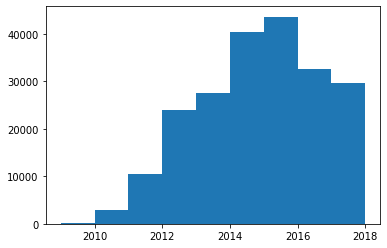

In [ ]:
#Now time to determine if we should keep all years                                                 
ks_df['year'] = pd.DatetimeIndex(data=ks_df['launched'], freq='infer', ambiguous='infer').year
print(plt.hist(ks_df['year'], range(2009, 2019))) #Kickstarter was founded in 2009 and the data is only through the year 2017
ks_df.groupby('year').count()

In [ ]:
# It stands to reason the most recent data would be the most applicable to guage current user behavior, so I'm only going to use projects from 2017.
# There are lots of datapoints that are contained there, likely enough to test on once we divide this data into further categories.
ks_df = ks_df[ks_df['year'] == 2017]
ks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29684 entries, 14 to 378654
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   ID             29684 non-null  int64          
 1   name           29684 non-null  object         
 2   category       29684 non-null  object         
 3   main_category  29684 non-null  object         
 4   currency       29684 non-null  object         
 5   deadline       29684 non-null  object         
 6   launched       29684 non-null  object         
 7   state          29684 non-null  object         
 8   backers        29684 non-null  int64          
 9   country        29684 non-null  object         
 10  pledged        29684 non-null  float64        
 11  goal           29684 non-null  float64        
 12  day_length     29684 non-null  timedelta64[ns]
 13  year           29684 non-null  int64          
dtypes: float64(2), int64(3), object(8), timedelta64[ns](

In [ ]:
# Finally we want goal to be greater than or equal to 0, and pledged to be greater than or equal to 1
ks_df = ks_df[ks_df['goal'] >= 1]
ks_df = ks_df[ks_df['pledged'] >= 0]
ks_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29683 entries, 14 to 378654
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   ID             29683 non-null  int64          
 1   name           29683 non-null  object         
 2   category       29683 non-null  object         
 3   main_category  29683 non-null  object         
 4   currency       29683 non-null  object         
 5   deadline       29683 non-null  object         
 6   launched       29683 non-null  object         
 7   state          29683 non-null  object         
 8   backers        29683 non-null  int64          
 9   country        29683 non-null  object         
 10  pledged        29683 non-null  float64        
 11  goal           29683 non-null  float64        
 12  day_length     29683 non-null  timedelta64[ns]
 13  year           29683 non-null  int64          
dtypes: float64(2), int64(3), object(8), timedelta64[ns](

In [ ]:
# Didn't changed anything but good to verify!

In [ ]:
# Now let's define our key metric
ks_df['key_metric'] = (ks_df['pledged'] / ks_df['goal']) # Measuring how much more/less pledged amount is compared to goal
ks_df.head()
# For key metric values:
## key_metric < 1    The pledged didn't meet the goal and the project failed
## key_metric = 1    The pledged met the goal exactly and the project was successful
## key_metric > 1    The pledged beat the goal and the project exceeded expectations

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,pledged,goal,day_length,year,key_metric
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,2017-04-05,successful,761,GB,121857.33,6469.73,28 days,2017,18.834995
21,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,2017-09-07,2017-08-08,failed,1,AU,0.81,2026.10,30 days,2017,0.000400
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,2017-04-03,successful,840,US,57577.31,50000.00,30 days,2017,1.151546
43,1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,2017-03-27,2017-03-02,failed,25,US,856.00,1500.00,25 days,2017,0.570667
67,1000256230,Shreddit - Privacy on Reddit,Software,Technology,GBP,2017-07-02,2017-06-02,failed,0,GB,0.00,2579.35,30 days,2017,0.000000


In [ ]:
#Let's see some overall stats on the key_metric
successful = ks_df[ks_df['key_metric'] >= 1]
failed = ks_df[ks_df['key_metric'] < 1]

print('Key metric stats for successful projects:')
print(successful['key_metric'].describe())
print()
print('Key metric stats for failed projects')
print(failed['key_metric'].describe())

Key metric stats for successful projects:
count    12881.000000
mean         5.579564
std        102.863947
min          1.000000
25%          1.068667
50%          1.279983
75%          2.277347
max       9302.500000
Name: key_metric, dtype: float64

Key metric stats for failed projects
count    16802.000000
mean         0.098540
std          0.165299
min          0.000000
25%          0.000364
50%          0.016668
75%          0.122010
max          0.991000
Name: key_metric, dtype: float64


(array([13112.,  1744.,   970.,   540.,   278.,   136.,  2635.,  2982.,
         1372.,   786.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ]),
 <a list of 10 Patch objects>)

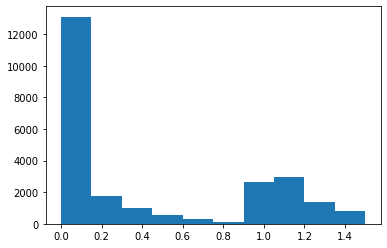

In [ ]:
# Let's look at the distribution near 1
plt.hist(ks_df['key_metric'], range=(0, 1.5))


This looks as expected, with many projects being put up that aren't successful at all, not so many values for partially successful projects, and a jump around
1, representing close to or perfectly successful projects


In [ ]:
# There are fifteen main categories.  Tests will be conducted within dataframes of only a single category to test as equal projects as possible
ks_df['main_category'].unique()

array(['Games', 'Fashion', 'Film & Video', 'Technology', 'Art', 'Music',
       'Journalism', 'Design', 'Publishing', 'Comics', 'Crafts', 'Food',
       'Dance', 'Theater', 'Photography'], dtype=object)

In [ ]:
#### Now we want to see if having a higher asking goal increases the percent amount over you get back.
##### To measure this, I'm going divide datasets by lower goal and higher goal, and then running a Kruskel test on their respective key_metrics
##### Kruskel seems to be the most appropriate test as distribution of the key metric doesn't follow a normal distribution for any category

In [ ]:
### Testing between lower goal and higher goal project

def sig_test(df):   ## For running a test on a dataframe
  median = df['goal'].median()
  lower_group = df[df['goal'] < median]
  upper_group = df[df['goal'] > median]
  iqr = 1.5 * (upper_group['key_metric'].quantile(0.75) - upper_group['key_metric'].quantile(0.25)) #Eliminating outliers
  upper_group = upper_group[upper_group['key_metric'] <= (upper_group['key_metric'].quantile(0.75) + iqr)]
  lower_group = lower_group[lower_group['key_metric'] >= (lower_group['key_metric'].quantile(0.25) - iqr)]
  return stats.kruskal(lower_group['key_metric'], upper_group['key_metric'])


scipy.stats.kruskal(*args, **kwargs)[source]
Compute the Kruskal-Wallis H-test for independent samples.

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

In [ ]:
categories = ks_df['main_category'].unique()

def all_results(df):
  all_stats = []
  for i in categories:    ## Testing on all categories
   test_cat = ks_df[ks_df['main_category'] == i]
   j = sig_test(test_cat)
   all_stats.append("For category " + str(i) + ': ' + str(j))
  return all_stats  # Returns all stats from tests on individual categories

all_results(ks_df)

['For category Games: KruskalResult(statistic=439.4856615313702, pvalue=1.400832593434571e-97)',
 'For category Fashion: KruskalResult(statistic=169.19465568784025, pvalue=1.1093385547074797e-38)',
 'For category Film & Video: KruskalResult(statistic=61.2317791621017, pvalue=5.073594033956713e-15)',
 'For category Technology: KruskalResult(statistic=262.275160044925, pvalue=5.477643054262004e-59)',
 'For category Art: KruskalResult(statistic=397.54383196629817, pvalue=1.8863211091032133e-88)',
 'For category Music: KruskalResult(statistic=40.08831568968806, pvalue=2.427365479602974e-10)',
 'For category Journalism: KruskalResult(statistic=56.56827578310781, pvalue=5.4280540616091223e-14)',
 'For category Design: KruskalResult(statistic=256.52886519078396, pvalue=9.798506059900671e-58)',
 'For category Publishing: KruskalResult(statistic=115.34958297239376, pvalue=6.597837914033077e-27)',
 'For category Comics: KruskalResult(statistic=162.8498440094919, pvalue=2.6978946286679313e-37)',


In [ ]:
### P-values of all categories are rejecting the H0, indicating that there is statistically significance in the key_metric for lower goal and higher goal projects
### It seems a difference in initial goal amounts leads to a difference in pledge amount

In [ ]:
### To be a little more nuanced, I'm now going to break down goal amount into smaller quantile groups (by 0.1) to see if there's a difference 
### on a smaller scale.

In [ ]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

def sig_test_2(df):
  tests = []
  for i in quantiles:
    lower_group = df[df['goal'] > df['goal'].quantile(i - 0.1)]      
    lower_group = df[df['goal'] < df['goal'].quantile(i)]

    upper_group = df[df['goal'] > df['goal'].quantile(i)]
    upper_group = df[df['goal'] < df['goal'].quantile(i + 0.1)]

    j =  "Test between quantiles " + str(i - 0.1) + ' and ' + str(i) + ' & ' + str(i) + ' and ' + str(i+0.1) + ': ' + str(stats.kruskal(lower_group['key_metric'], upper_group['key_metric']))
    tests.append(j)
  return tests

In [ ]:
print("What category do you want to test on?")
test_category_df = ks_df[ks_df['main_category'] == input()]
sig_test_2(test_category_df)

What category do you want to test on?
Publishing


['Test between quantiles 0.0 and 0.1 & 0.1 and 0.2: KruskalResult(statistic=1.354800670936844, pvalue=0.24444060720066624)',
 'Test between quantiles 0.1 and 0.2 & 0.2 and 0.30000000000000004: KruskalResult(statistic=1.4023652694646547, pvalue=0.23632794860089526)',
 'Test between quantiles 0.19999999999999998 and 0.3 & 0.3 and 0.4: KruskalResult(statistic=2.177406098444457, pvalue=0.1400503277566755)',
 'Test between quantiles 0.30000000000000004 and 0.4 & 0.4 and 0.5: KruskalResult(statistic=0.49713837118636217, pvalue=0.48076020288476495)',
 'Test between quantiles 0.4 and 0.5 & 0.5 and 0.6: KruskalResult(statistic=0.1074414126406304, pvalue=0.7430760676657397)',
 'Test between quantiles 0.5 and 0.6 & 0.6 and 0.7: KruskalResult(statistic=3.296872796395154, pvalue=0.06941191117322408)',
 'Test between quantiles 0.6 and 0.7 & 0.7 and 0.7999999999999999: KruskalResult(statistic=0.0001846727140636548, pvalue=0.9891575342100807)',
 'Test between quantiles 0.7000000000000001 and 0.8 & 0.8

In [ ]:
categories = ks_df['main_category'].unique()

def all_results(df):
  all_stats = []
  for i in categories:
   test_cat = ks_df[ks_df['main_category'] == i]
   j = sig_test_2(test_cat)
   all_stats.append("For category " + str(i) + ' with length ' + str(len(test_cat)) + ': ' + str(j) + ': For category ' + str(i))
  return all_stats

all_results(ks_df)

["For category Games with length 3952: ['Test between quantiles 0.0 and 0.1 & 0.1 and 0.2: KruskalResult(statistic=0.6334803762358122, pvalue=0.42608155565020966)', 'Test between quantiles 0.1 and 0.2 & 0.2 and 0.30000000000000004: KruskalResult(statistic=5.9442306723017015, pvalue=0.014765534484196015)', 'Test between quantiles 0.19999999999999998 and 0.3 & 0.3 and 0.4: KruskalResult(statistic=9.240255445631096, pvalue=0.002367519241816715)', 'Test between quantiles 0.30000000000000004 and 0.4 & 0.4 and 0.5: KruskalResult(statistic=1.222098993440914, pvalue=0.2689491167326763)', 'Test between quantiles 0.4 and 0.5 & 0.5 and 0.6: KruskalResult(statistic=7.398546851963086, pvalue=0.0065276587134362974)', 'Test between quantiles 0.5 and 0.6 & 0.6 and 0.7: KruskalResult(statistic=0.9978971838614419, pvalue=0.3178198633480547)', 'Test between quantiles 0.6 and 0.7 & 0.7 and 0.7999999999999999: KruskalResult(statistic=4.319764881928502, pvalue=0.03767212709470824)', 'Test between quantiles 

In [ ]:
## The resulting output is very messy so I'll look for a way to clean up, but wanted to see if this was all good so far!!